In [89]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [90]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

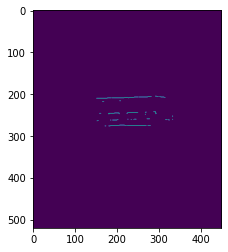

In [97]:
filters = build_filters()

img2 = cv2.imread('images/sonar0.jpg', 0)



img2 = process(img2, filters)

img2 = cv2.GaussianBlur(img2, (9,9), cv2.BORDER_DEFAULT)
img2 = cv2.Canny(img2, 200, 200)

plt.imshow(img2)

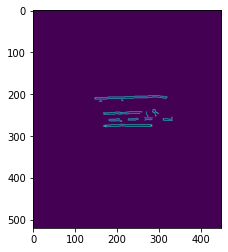

In [98]:
img3 = process(img2, filters)

img3 = cv2.GaussianBlur(img3, (3,3), cv2.BORDER_DEFAULT)
img3 = cv2.Canny(img3, 100, 200)

plt.imshow(img3)

In [99]:
w, h = img3.shape[0:2]
xSum = np.sum(img3 / 255, axis=0)
ySum = np.sum(img3 / 255, axis=1)

In [100]:
xThr = 0
yThr = 0

# Find proper row indices
tmp = np.argwhere(xSum > xThr)
tmp = tmp[np.where((tmp > 20) & (tmp < w - 20))]
x1 = tmp[0]
x2 = tmp[-1]

# Find proper column indices
tmp = np.argwhere(ySum > yThr)
tmp = tmp[np.where((tmp > 20) & (tmp < h - 20))]
y1 = tmp[0]
y2 = tmp[-1]

# Visualize result
out = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)
#cv2.rectangle(out, (x1, y1), (x2, y2), (0, 0, 255), 4)

O1 = int((x1+x2)/2)
O2 = int((y1+y2)/2)
R = int(np.sqrt((x1-x2)**2 + (y1-y2)**2)/2)
cv2.circle(out, (O1, O2), R, (255, 0, 0), 4)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

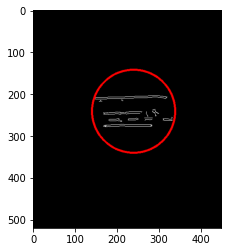

In [101]:
plt.imshow(out)